# Case Study 4 : Data Science in Email Data

**Required Readings:** 
* [Enron Emails](https://www.kaggle.com/wcukierski/enron-email-dataset) 
* Please download the Enron Email dataset from [here](https://www.cs.cmu.edu/~./enron/).
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Email Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

# Data Collection/Processing: 

In [66]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# read csv
import csv
import numpy as np

csv.field_size_limit(1000000000)
csvFile = open("emails.csv", "r")
reader = csv.reader(csvFile)

print "read csv complete\n", reader

read csv complete


In [67]:
# get the sender, receiver, date, and content info from "sent_mail" and "sent_item"

ct = 0
contact = []
date_content = []

for item in reader:
    if ct == 0:
        ct += 1
        continue
    if "sent_mail" in item[0] or "sent_item" in item[0]:
        if ct < 25000:
#         print(item[0])
            item_split = item[1].split("\n")
#             if ct < 15:
#                 print item_split
            date_flag = False
            subitem_ct = 0
            for subitem in item_split:
                if "X-From:" in subitem:
                    sender = subitem.split(": ")
                    sender_name = sender[1]
                    if sender_name.find("<") != -1:
                        sender_name = sender_name[:sender_name.find("<")-1]
                    if "," in sender_name:
                        temp = sender_name.split(", ")
                        sender_name = temp[1] + " " + temp[0]
#                     print "Sender:" + sender_name
                    
                if "X-To:" in subitem:
                    receivers_info = subitem.split(": ")
#                 print receivers
                    receivers = receivers_info[1].split(", ")
                    for receiver in receivers:
#                         print receiver
                        contact.append([sender_name, receiver])
#                         print [sender_name, receiver]
#                     print receivers
                
                if "Date:" in subitem and date_flag == False:
                    date_flag = True
                    dateitem = subitem.split(": ")
                    date = dateitem[1].split(",")
                    date_str = date[1]
                    date_str_short = date_str[1:12]
#                     print date_str_short

                if "X-FileName" in subitem:
#                     print subitem_ct
                    content = ""
                    for seg in item_split[subitem_ct+1:]:
                        content += seg + " "
#                     print content + "\n"
                    
                    date_content.append([date_str_short, content])
                subitem_ct += 1
            ct += 1
        else:
            break

contact = np.asmatrix(contact)
print "First 10 contacts:\n", contact[:10]
print "\n"
print "First 10 time and content:\n", date_content[:10]

First 10 contacts:
[['Phillip K Allen' 'Tim Belden <Tim Belden/Enron@EnronXGate>']
 ['Phillip K Allen'
  'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>']
 ['Phillip K Allen' 'Leah Van Arsdall']
 ['Phillip K Allen' 'Randall L Gay']
 ['Phillip K Allen' 'Greg Piper']
 ['Phillip K Allen' 'Greg Piper']
 ['Phillip K Allen' 'david.l.johnson@enron.com']
 ['Phillip K Allen' 'John Shafer']
 ['Phillip K Allen' 'Joyce Teixeira']
 ['Phillip K Allen' 'Mark Scott']]


First 10 time and content:
[['14 May 2001', ' Here is our forecast    '], ['4 May 2001 ', " Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.  As far as the business meetings, I think it would be more productive to try and stimulate discussions across the

# Data Exploration: Exploring the Email Dataset

** plot email communication graph/network** 
* each node is an email account
* the weight of an edge between two accounts depends on how many emails have been sent between them.

In [68]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# plot the first 1000 contact

import networkx as nx
g = nx.Graph()
g.clear()

sender_list = []
sender_temp = ""
w = {}

for contact_i in range(1001):
    if contact[contact_i, 0] not in sender_list:
        g.add_node(contact[contact_i, 0])
        sender_list.append(contact[contact_i, 0])
    sender_temp = contact[contact_i, 0]
    receiver_temp = contact[contact_i, 1]
#     print receiver_temp
    if sender_temp + receiver_temp in w.keys():
        weight = w[sender_temp + receiver_temp]
        w[sender_temp + receiver_temp] = weight + 1
#         print w[receiver_temp]
    else:
        w[sender_temp + receiver_temp] = 1
        g.add_node(receiver_temp)
#     print [sender_temp, receiver_temp]
#     print sender_temp,receiver_temp, w[sender_temp + receiver_temp]
    g.add_edge(sender_temp,receiver_temp, weight = w[sender_temp + receiver_temp])

# g.nodes()
print "Have read", contact_i, "contacts."

Have read 1000 contacts.


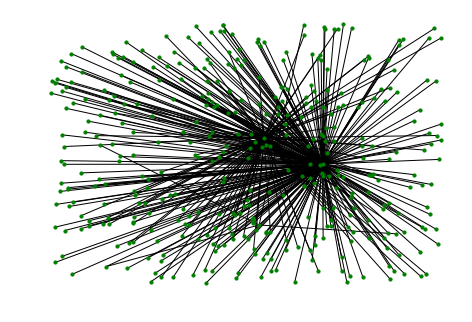

In [86]:
import matplotlib.pyplot as plt

nx.draw_random(g, node_color = 'g',node_size =10)
plt.savefig("contact.png", dpi = 500)
plt.show(nx)

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

Write codes to implement the solution in python:

In [2]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from textblob import TextBlob













# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary








*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 5".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) plot email communication graph/network (10 points):
       0: missing answer
       4: okay, but with major problems
       7: good, but with minor problems
      10: perfect
    

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  (5 bonus points)
        0: I vote the other team is better than this team
        5: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9


